# Introduction

This project aims to analyze biodiversity data from the National Parks Service, focusing on various species observed in different national park locations.

The project will encompass scoping, analyzing, preparing, plotting the data, and seeking explanations from the analysis.

Here are some key questions this project seeks to answe * r:

What is the distribution of conservation status for sp
 * cies?
Are certain types of species more likely to be enda
 * gered?
Are the differences between species and their conservation status statistically sign
 * ficant?
Which animal is most prevalent and what is its distribution amongs
t parks?
Data sour s:

Both Observations.csv and Species_info.csv were provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional. 

## Scoping

### Project Overview

The goal of this project is to interpret and analyze data provided by the National Park Service on endangered species across different parks in the United States. By analyzing species conservation statuses and the frequency of species observations in various national parks, this project aims to identify patterns and themes among endangered species, classify them based on their conservation status, and explore relationships between species categories and parks where they are observed.

### Project Goals

* Analyze Species Conservation Statuses: Investigate which types of species (mammals, birds, plants, etc.) are most at risk and if certain categories are disproportionately endangered.

* Identify Patterns in Endangered Species: Explore patterns in the species that are endangered across different national parks. Are there particular parks where endangered species are more frequently observed?

* Species Observations and Park Data: Examine the number of observations of endangered species across different parks to understand the distribution and prevalence of endangered species in various geographic locations.

* Visualize the Data: Use data visualization techniques to provide insights into species distributions, conservation statuses, and patterns within parks.

* Conclusions and Recommendations: Based on the analysis, make recommendations on potential conservation actions or park-specific efforts to monitor and protect endangered species.


## Importing Python Modules

Importing the python modules to start off the project:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

To analyze the conservation status of species and their observations in national parks, we will first load the datasets (two tables) into `DataFrames` called `observations` and `species`.

Once loaded as DataFrames, datasets can be used for exploration and visualization.

In [126]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [128]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

### Key Data Characteristics

We being exploring our data by finding the key data characteristics such as the total number of rows and columns in the two 'DataFrames'.

In [9]:
print(f"Species Shape: {species.shape}")

print(f"Observations shape: {observations.shape}")

Species Shape: (5824, 4)
Observations shape: (23296, 3)


## Exploratory Data Analysis

We now move to exploring our data in more depth. We will first look into the number of unique observations for each variable and their data types.

In [137]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [140]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here is a chance to drill one level deeper and see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [143]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

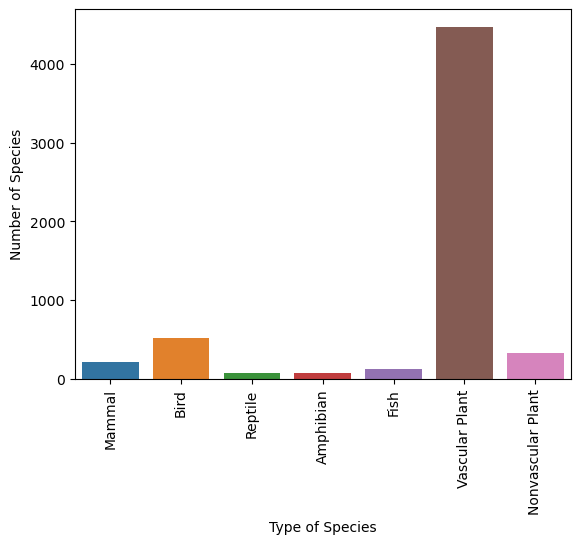

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [179]:
sns.countplot(x='category', data=species)
plt.xticks(rotation=90)
plt.xlabel("Type of Species")
plt.ylabel("Number of Species")
plt.show()
plt.close

Another column to explore is `conservation_status`. The column has 4 categories:

In [148]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [150]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


The above analysis gives us further understanding of the `species` dataset and its key columns. 

In [153]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

print(f"number of observations:{observations.observations.sum()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
number of observations:3314739


The above analysis gives us further understanding of the `observations` dataset and its columns. 

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [161]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [164]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


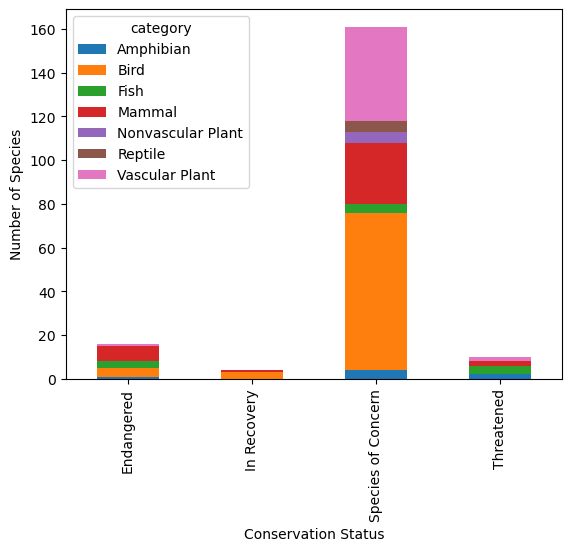

In [177]:
conservationCategory.plot(kind='bar', stacked=True)

plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()
plt.close()

### Conservation Status

The next question we want to answer is whether certain types of species are more likely to be endangered. To do this, we will group the `conservation_status` data by `category` for all values, except the `No Intervention`. We would then calculate the counts of each group.   

In [182]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [185]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [189]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Difference

We will not find out if the differences between species and their conservation status significant using chi-squared statistical significance test.

We will first create a contingency table that will look like this: 
||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

We will call the test as `contingency1` and will the correct numbers for mammals and birds. 

In [203]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2, pval, dof, expected = chi2_contingency(contingency1)

print(expected)
print(chi2)

[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]
0.1617014831654557


The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [205]:
contingency2 = [[30, 146],
               [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
print(expected)
print(chi2)

[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]
4.289183096203645


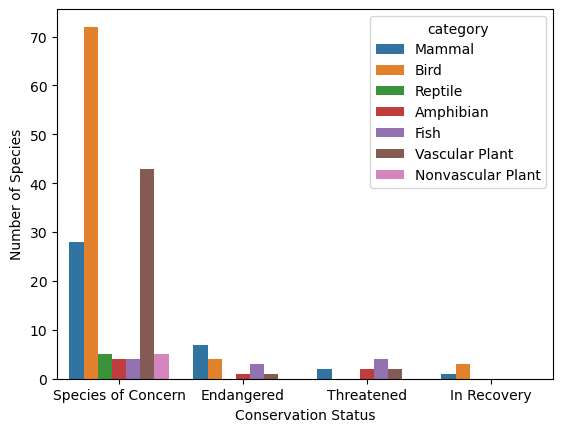

In [114]:
sns.countplot(x='conservation_status', hue='category', data=species)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()
plt.close()

### Species in Parks

We now want to find out Which species were spotted the most at each park.


In [208]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [210]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [212]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [214]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
22,Bat,23
191,Shrew,18
70,Myotis,17
5,Mouse,16
162,Chipmunk,13
137,Squirrel,12
183,American,12
50,Eastern,11
151,Vole,11
0,Western,10


In [216]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [218]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [220]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


In [222]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [224]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

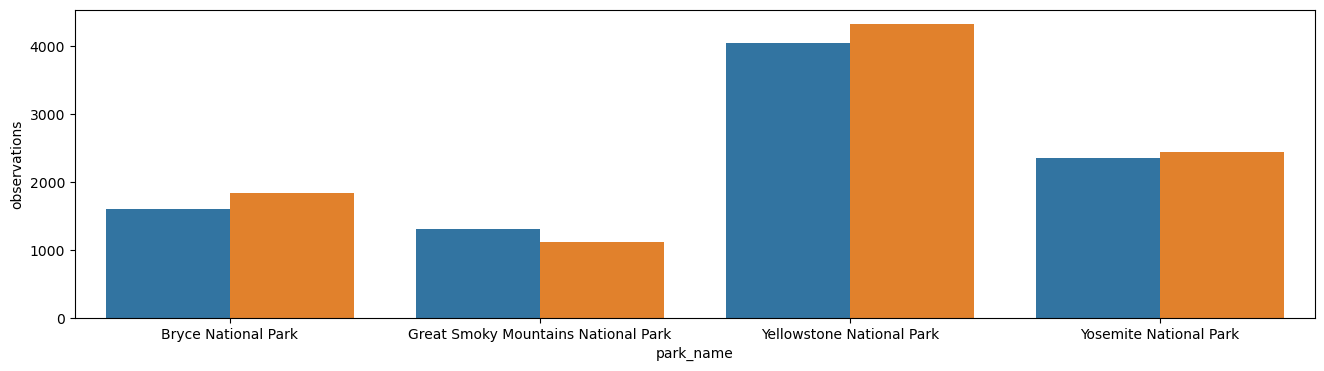

In [228]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

What is the distribution of conservation status for species?
The vast majority of species were not part of conservation.(5,633 vs 191)
Are certain types of species more likely to be endangered?
Mammals and Birds had the highest percentage of being in protection.
Are the differences between species and their conservation status significant?
While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
Which animal is most prevalent and what is their distribution amongst parks?
the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.